In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install stop_words

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting %matplotlib inline
import os # accessing directory structure
import nltk
import re
import spacy
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer ####Lemmatization
from nltk.corpus import wordnet # Lemmatize with POS Tag


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/drive/My Drive/yelp dataset/yelp_review.csv")

In [ ]:
data.shape

(5261668, 9)

In [ ]:
data = data.loc[:10000]

In [ ]:
data.shape

(10001, 9)

In [ ]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10001 rows and 9 columns


In [ ]:
data.dtypes #DataTypes

review_id      object
user_id        object
business_id    object
stars           int64
date           object
text           object
useful          int64
funny           int64
cool            int64
dtype: object

In [ ]:
data["text"] = data["text"].astype(str)

TEXT CLEANING

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [ ]:
data["textclean"] = data["text"].apply(lambda text: remove_urls(text))

In [ ]:
data.head()

In [ ]:
top_N = 100 #top 100 words

#convert list of list into text
a = data['textclean'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [ ]:
#remove all the stopwords from the text
nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

LIMMATIZATION

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]

FREQUENCY DISTRIBUTION

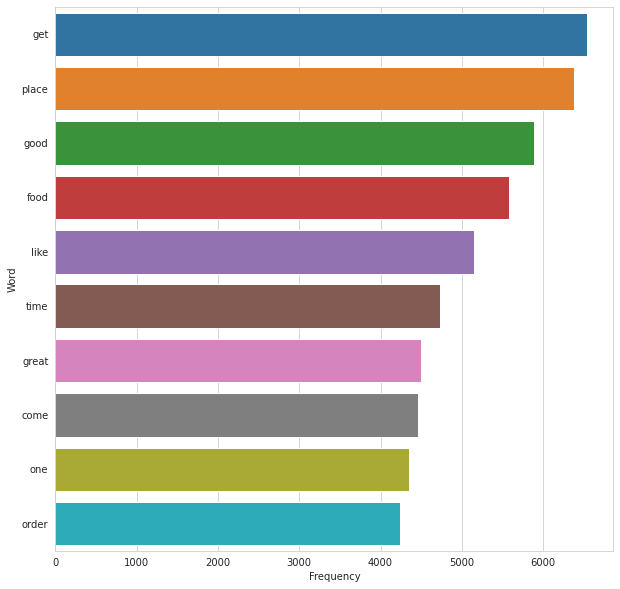

In [ ]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

WORDCLOUD

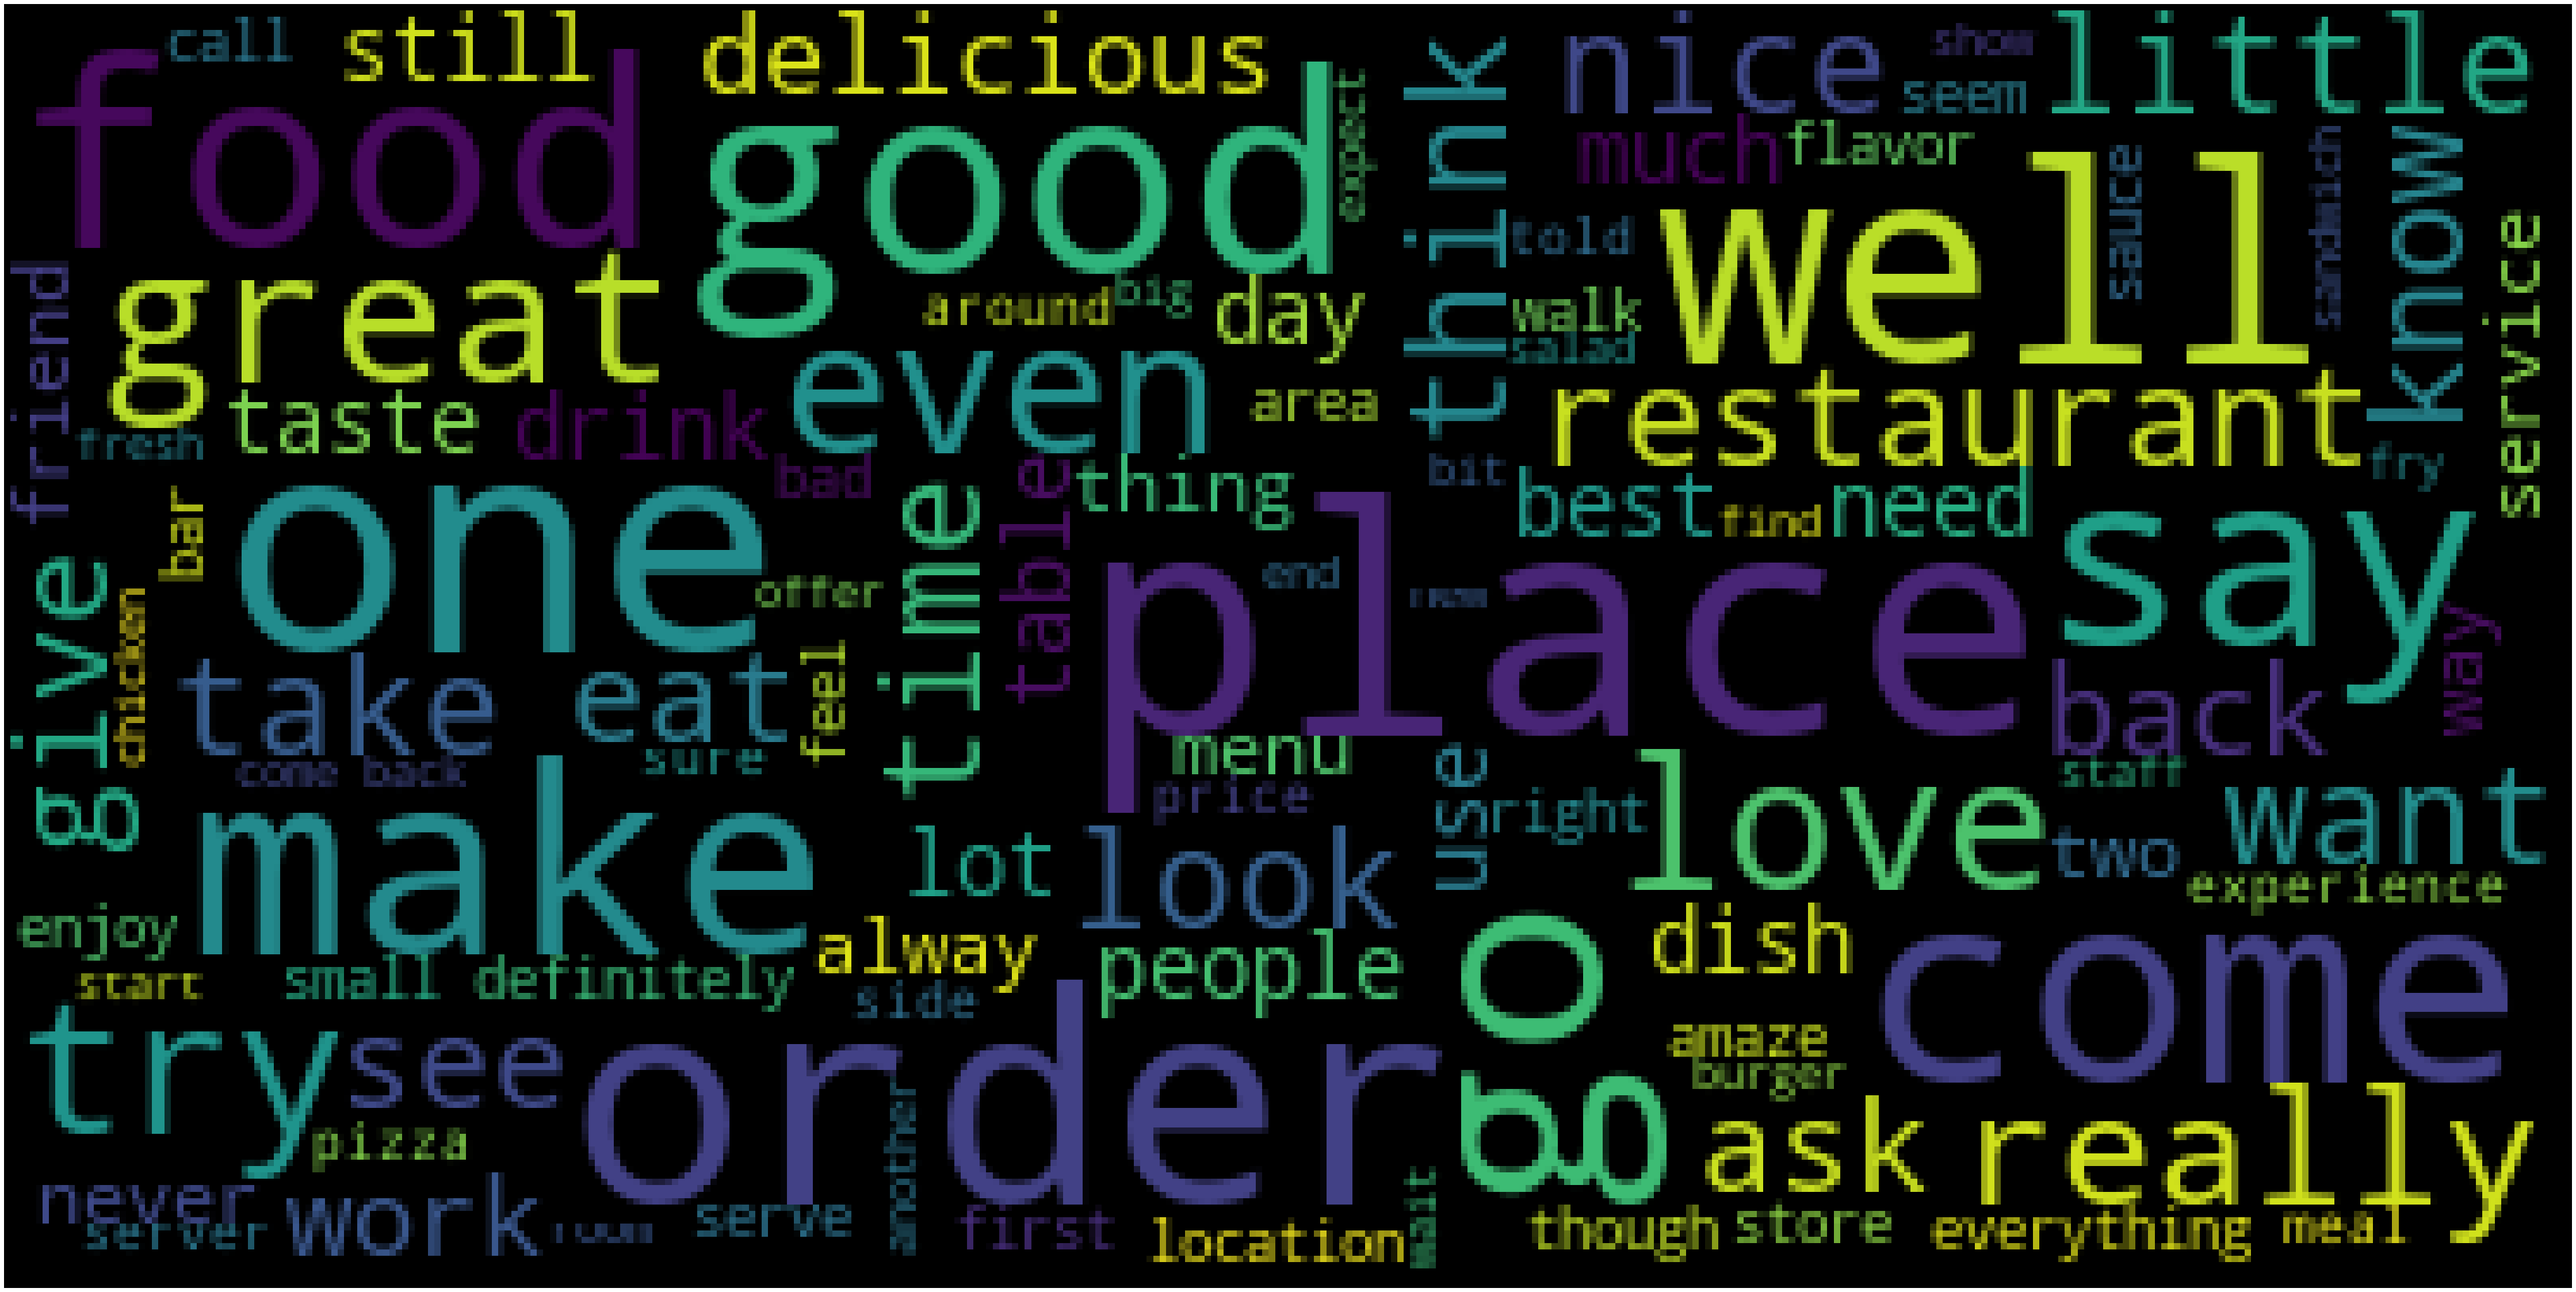

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

wc(lemmatized_output,'black','Common Words' )

VADER + TEXTBLOB SENTIMENTAL ANALYSIS

In [ ]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

data["Polarity"] = data["textclean"].apply(sentiment)

data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,textclean,Polarity
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Super simple place but amazing nonetheless. It...,0.9551
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Small unassuming place that changes their menu...,0.8167
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Lester's is located in a beautiful neighborhoo...,0.6249
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Love coming here. Yes the place always needs t...,0.8560
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Had their chocolate almond croissant and it wa...,0.8313


In [ ]:
data.dtypes

review_id       object
user_id         object
business_id     object
stars            int64
date            object
text            object
useful           int64
funny            int64
cool             int64
textclean       object
Polarity       float64
dtype: object

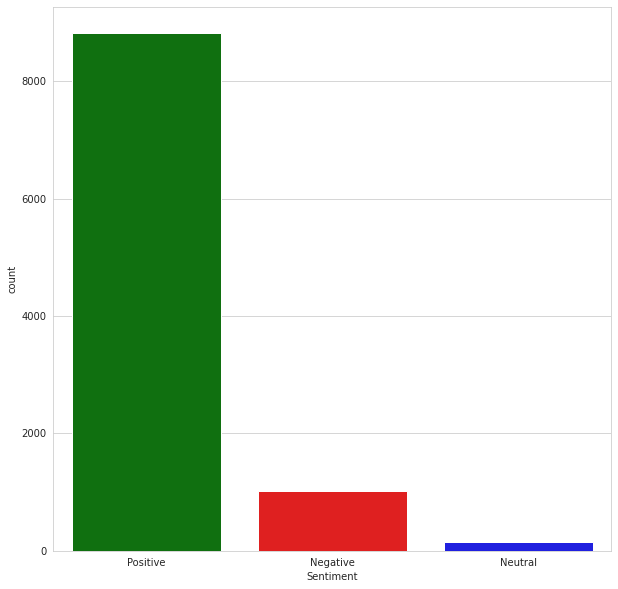

In [ ]:
def senti(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

data['Sentiment'] = data.apply(senti, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

ASPECT MINING/ OPINION MINING

In [ ]:
#import spacy
nlp = spacy.load("en_core_web_sm")

def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
data["Aspects"] = data["textclean"].apply(pos)

In [ ]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,textclean,Polarity,Sentiment,Aspects
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Super simple place but amazing nonetheless. It...,0.9551,Positive,"[place, thing, salami, mustard, Staff]"
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Small unassuming place that changes their menu...,0.8167,Positive,"[place, menu, decor, vibe, seat, restaurant, r..."
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Lester's is located in a beautiful neighborhoo...,0.6249,Positive,"[neighborhood, meat, deli, brisket, sandwich, ..."
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Love coming here. Yes the place always needs t...,0.8560,Positive,"[Love, place, floor, peanuts, shell, bit, food..."
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Had their chocolate almond croissant and it wa...,0.8313,Positive,"[chocolate, almond, croissant, light, buttery,..."


In [ ]:
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(6143, 13)
0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
5    Cycle Pub Las Vegas was a blast! Got a groupon...
8    Not bad!! Love that there is a gluten-free, ve...
Name: text, dtype: object
0    5
1    5
2    5
5    5
8    3
Name: stars, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np
vocab = CountVectorizer(analyzer=remove_urls).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names()[100])
print(vocab.get_feature_names()[100])


190
Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. 

Staff was very helpful and friendly.
  (0, 0)	2
  (0, 1)	34
  (0, 8)	2
  (0, 15)	3
  (0, 17)	1
  (0, 20)	1
  (0, 27)	1
  (0, 40)	1
  (0, 50)	2
  (0, 64)	17
  (0, 65)	3
  (0, 66)	3
  (0, 67)	8
  (0, 68)	20
  (0, 69)	4
  (0, 70)	3
  (0, 71)	10
  (0, 72)	10
  (0, 75)	10
  (0, 76)	5
  (0, 77)	13
  (0, 78)	4
  (0, 79)	4
  (0, 81)	7
  (0, 82)	14
  (0, 83)	15
  (0, 84)	5
  (0, 85)	2
  (0, 86)	4
  (0, 88)	4
  (0, 89)	1
Getting the words back:
È
È


In [ ]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (6143, 190)
Non-Zero occurences:  240183
Density of the matrix =  20.578236246647876


In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 81  42  63]
 [ 43 168 127]
 [ 53  99 553]]
Score: 65.26
Classification Report:               precision    recall  f1-score   support

           1       0.46      0.44      0.45       186
           3       0.54      0.50      0.52       338
           5       0.74      0.78      0.76       705

    accuracy                           0.65      1229
   macro avg       0.58      0.57      0.58      1229
weighted avg       0.65      0.65      0.65      1229



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 44  55  87]
 [ 47 131 160]
 [ 69 153 483]]
Score: 53.54
Classification Report:               precision    recall  f1-score   support

           1       0.28      0.24      0.25       186
           3       0.39      0.39      0.39       338
           5       0.66      0.69      0.67       705

    accuracy                           0.54      1229
   macro avg       0.44      0.44      0.44      1229
weighted avg       0.53      0.54      0.53      1229



In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[  0  17 169]
 [  0  39 299]
 [  0  16 689]]
Score: 59.24
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       186
           3       0.54      0.12      0.19       338
           5       0.60      0.98      0.74       705

    accuracy                           0.59      1229
   macro avg       0.38      0.36      0.31      1229
weighted avg       0.49      0.59      0.48      1229



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 16  42 128]
 [ 11 131 196]
 [ 12 107 586]]
Score:  59.64
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.09      0.14       186
           3       0.47      0.39      0.42       338
           5       0.64      0.83      0.73       705

    accuracy                           0.60      1229
   macro avg       0.51      0.43      0.43      1229
weighted avg       0.56      0.60      0.55      1229



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 15  40 131]
 [  1 110 227]
 [  1  65 639]]
Score: 62.16
Classification Report:               precision    recall  f1-score   support

           1       0.88      0.08      0.15       186
           3       0.51      0.33      0.40       338
           5       0.64      0.91      0.75       705

    accuracy                           0.62      1229
   macro avg       0.68      0.44      0.43      1229
weighted avg       0.64      0.62      0.56      1229



From the above modellings:
1.  Multinominal Naive Bayes -  65.26
2.  Decision Tree -  53.54
3.  Support Vector Machine -  59.24
4.  K- Nearest Neighbor Classifier -  59.64
5.  Random Forest Classifier-  62.16

Here, the Multinominal Naive Bayes has good score compared to other models
By using this model we can predict the positive, negative and average reviews

In [ ]:
# POSITIVE REVIEW
pr = data['text'][15]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

a must stop when you are in montreal!

I was in Mtl for the weekend and wind up eating here 2 nights in a row!

The sandwiches here are unbelieveable! The smoked meat is so tasty and salty but so good. The bread definitely complements the meat!

Not much of a line up if you come either later in the evening.

Remember to leave a tip in the plate when you order take out and the servers will be extra nice and funny!
Actual Rating:  5
Predicted Rating:


5

In [ ]:
# AVERAGE REVIEW
ar = data['text'][15]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mnb.predict(ar_t)[0]

a must stop when you are in montreal!

I was in Mtl for the weekend and wind up eating here 2 nights in a row!

The sandwiches here are unbelieveable! The smoked meat is so tasty and salty but so good. The bread definitely complements the meat!

Not much of a line up if you come either later in the evening.

Remember to leave a tip in the plate when you order take out and the servers will be extra nice and funny!
Actual Rating:  1
Predicted Rating:


5

In [ ]:
# NEGATIVE REVIEW
nr = data['text'][15]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mnb.predict(nr_t)[0]

a must stop when you are in montreal!

I was in Mtl for the weekend and wind up eating here 2 nights in a row!

The sandwiches here are unbelieveable! The smoked meat is so tasty and salty but so good. The bread definitely complements the meat!

Not much of a line up if you come either later in the evening.

Remember to leave a tip in the plate when you order take out and the servers will be extra nice and funny!
Actual Rating:  1
Predicted Rating:


5

In [ ]:
count = data['stars'].value_counts()
print(count)

5    3554
4    2967
3    1716
2     891
1     873
Name: stars, dtype: int64
